In [1]:
%matplotlib inline

In [33]:
import numpy as np

import sympy
import sympy as sp
sympy.init_printing()

from sympy import var, symbols

import matplotlib.pyplot as plt

In [3]:
n = 2
t = var('t')

coordinates = symbols(",".join(['x'] + ['theta%i'%i for i in range(1,n+1)]), real=True)
coordinates = tuple([c(t) for c in coordinates])
#velocities = tuple([c.diff(t) for c in coordinates])
velocities = symbols(",".join(['v'] + ['omega%i'%i for i in range(1,n+1)]), real=True)
velocities = tuple([c(t) for c in velocities])


lengths = symbols(','.join(['d%i'%i for i in range(1,n+1)]), real=True)
masses = symbols(','.join(['m%i'%i for i in range(1,n+1)]), real=True)
m_cart = symbols('C', real=True)

In [ ]:
#x = var('h')
#y = var('h1')

#z = (x + y + 3.141)**2
#x_vec = np.arange(0, 10, 0.1)
#y_vec = np.arange(0, 10, 0.1)
#f = sp.lambdify([x, y], z, 'numpy') 
#f(x_vec, y_vec)

In [27]:
def forces(i):
    if i == 0:
        return 0.
    else:
        return 0.

def hinges(i):
    if i == 1:
        return sp.Matrix((coordinates[0], 0.))
    else:
        return hinges(i-1) + lengths[i-1] * sp.Matrix((sp.cos(coordinates[i-1]),
                                                       sp.sin(coordinates[i-1])))

def armcenters(i):
    return hinges(i) + lengths[i-1]/2. * sp.Matrix((sp.cos(coordinates[i]),
                                                    sp.sin(coordinates[i])))

def ke(i):
    v = armcenters(i).diff(t)
    return 0.5 * masses[i-1] * v.dot(v)

def pe(i):
    return masses[i-1] * armcenters(i)[1]

def lagrangian(N):
    # Lagrangian for a `N` pendulum setup
    return (0.5 * m_cart * velocities[0]**2
            + sum(ke(i) for i in range(1,N+1))
            - sum(pe(i) for i in range(1,N+1)))

def EL(N):
    L = lambda n: lagrangian(n)
    #return [(L(i).diff(velocities[i]).diff(t) - L(i).diff(coordinates[i]),
    #         forces(i))
    #        for i in range(N+1)]
    return [L(i).diff(velocities[i]).diff(t) - L(i).diff(coordinates[i]) for i in range(N+1)]

In [5]:
from scipy.integrate import odeint

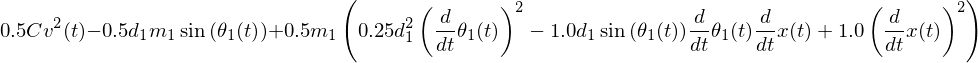

In [30]:
sp.simplify(lagrangian(1))

In [16]:
F = sp.lambdify([m_cart, velocities[0]], EL(0)[0], 'numpy') 

In [17]:
F(1,0)

NameError: global name 'Derivative' is not defined

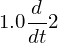

In [21]:
e.subs([(m_cart, 1.), (velocities[0], 2)])

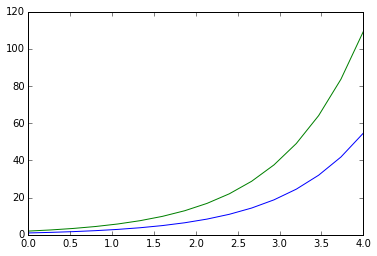

In [37]:
func = lambda y,t: y
X = np.linspace(0, 4, 16)
plt.plot(X, odeint(func, [1., 2.], X))